### Ejercicio 4
Para los datos de 'Coactivation_matrix.mat', filtre la matriz para obtener los valores > 0.2, con el nuevo arreglo muestre los nodos y vértices del grafo.

In [36]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat


In [38]:
data_path = r"Coactivation_matrix.mat"
mat = loadmat(data_path)
matrix = mat["Coactivation_matrix"] 

In [20]:
threshold = 0.2
filtered_matrix = np.where(matrix > threshold, matrix, 0)

In [28]:
G = nx.from_numpy_array(filtered_matrix)

In [40]:
pos_3d = nx.spring_layout(G, dim=3, seed=42)

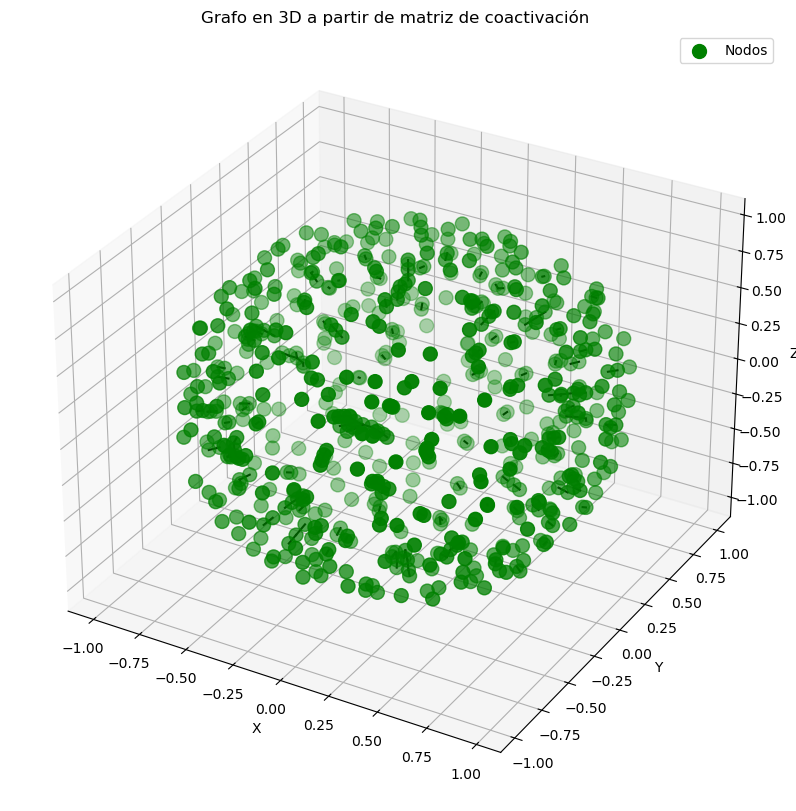

In [46]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

x_nodes = [pos_3d[node][0] for node in G.nodes()]
y_nodes = [pos_3d[node][1] for node in G.nodes()]
z_nodes = [pos_3d[node][2] for node in G.nodes()]

ax.scatter(x_nodes, y_nodes, z_nodes, c="green", s=100, label="Nodos")

for edge in G.edges():
    x_edges = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y_edges = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z_edges = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x_edges, y_edges, z_edges, c="black")

ax.set_title("Grafo en 3D a partir de matriz de coactivación")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()

In [30]:
print(f"Nodos: {G.number_of_nodes()}")
print(f"Aristas: {G.number_of_edges()}")

Nodos: 638
Aristas: 186
